In [1]:
#%% libraries
import pandas as pd
import matplotlib.pyplot as plt
#%% data

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

covid_df

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
UID,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",...,12130,12130,12130,12130,12130,12130,12130,12134,12134,12134
84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",...,6401,6401,6401,6401,6401,6401,6401,6406,6406,6406
84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",...,0,0,0,0,0,0,0,0,0,0


C:\Users\joshu\AppData\Local\Temp\ipykernel_16248\1079182476.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series.index = pd.to_datetime(time_series.index)  # Convert to datetime for formatting


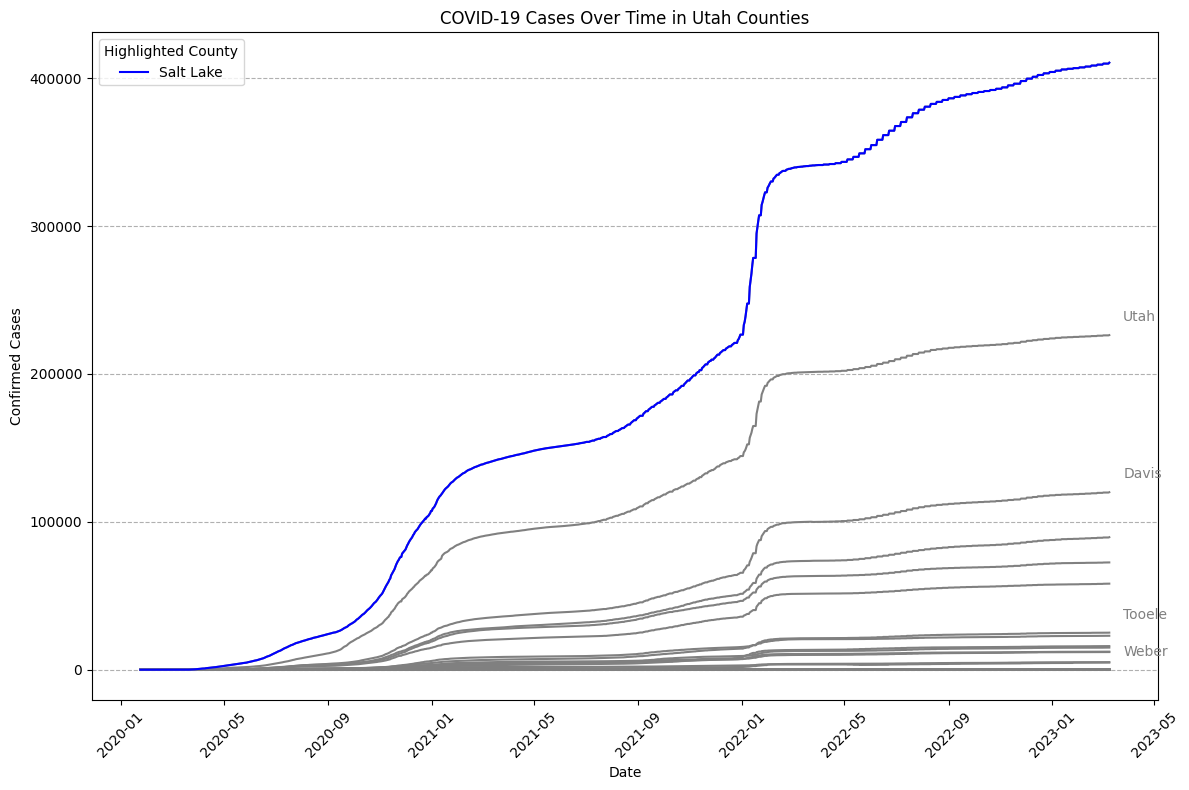

In [2]:
#%% viz 1
'''
Create a visualization that shows all of the counties in Utah as a time series,
similar to the one shown in slide 22 during the lecture. The graphic should
-Show cases over time
-Have all counties plotted in a background color (something like grey)
-Have a single county plotted in a contrasting color (something not grey)
-Have well formatted dates as the X axis
'''

utah_df = covid_df[covid_df['Province_State'] == 'Utah']
county_cases = utah_df.groupby('Admin2').sum() # Group by county and sum cases over time

# Extract only time series columns
time_series = county_cases.iloc[:, 11:]

# Transpose for easier plotting
time_series = time_series.transpose()
time_series.index = pd.to_datetime(time_series.index)  # Convert to datetime for formatting

plt.figure(figsize=(12, 8))
for county in time_series.columns:
    plt.plot(time_series.index, time_series[county], color='gray')

# Highlight a county
highlight_county = 'Salt Lake'
if highlight_county in time_series.columns:
    plt.plot(time_series.index, time_series[highlight_county], label=highlight_county, color='blue')

# Labeling a few other of the most populous counties
other_counties = ['Utah', 'Davis', 'Weber', 'Tooele']
for county in other_counties:
    if county in time_series.columns:
        plt.annotate(county, xy=(time_series.index[-1], time_series[county].iloc[-1]), 
                     xytext=(10, 10), textcoords='offset points', color='gray')

plt.title('COVID-19 Cases Over Time in Utah Counties')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.legend(title='Highlighted County')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

C:\Users\joshu\AppData\Local\Temp\ipykernel_16248\1416082951.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  utah_cases.index = pd.to_datetime(utah_cases.index)
C:\Users\joshu\AppData\Local\Temp\ipykernel_16248\1416082951.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  florida_cases.index = pd.to_datetime(florida_cases.index)


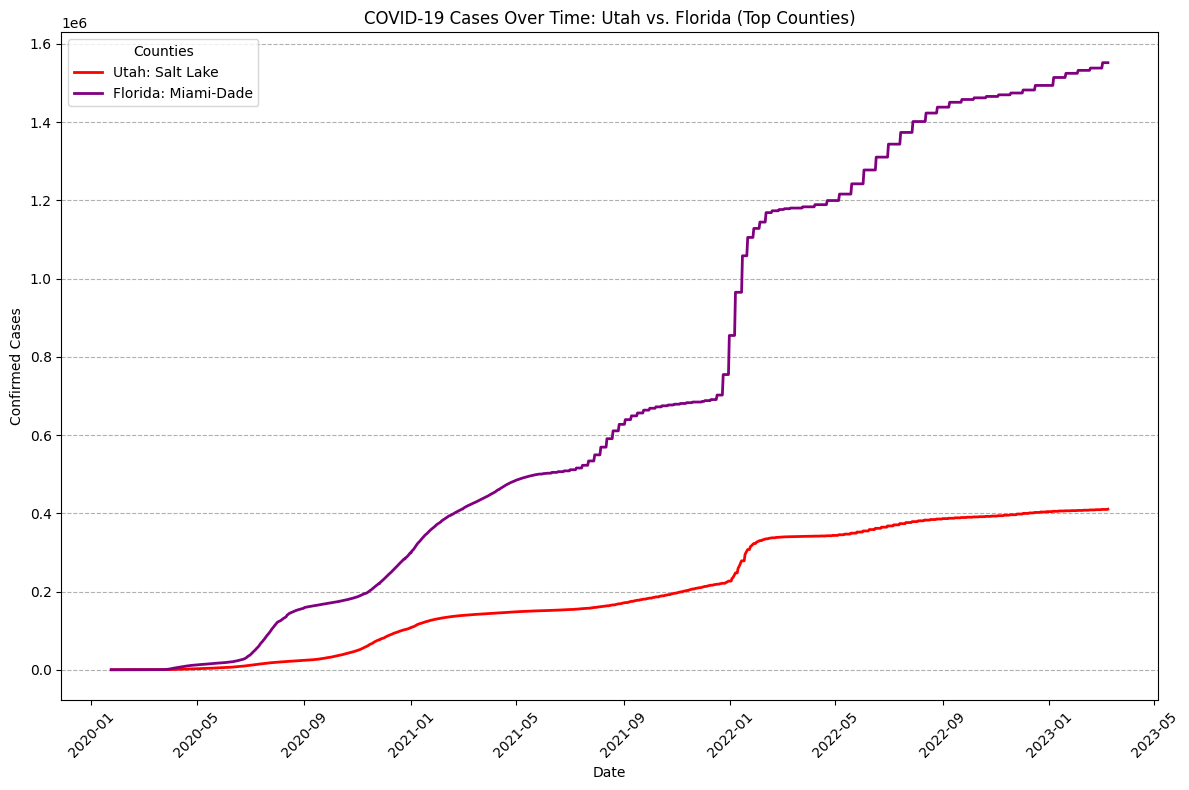

In [3]:
#%% viz 2
'''
Create a visualization that shows the contrast between the county in Utah with
the most cases to date to a county in Florida with the most cases to date.
The graphic should:
-Have only two counties plotted
-Highlight the difference between the two comparison counties
You may use any style of graphic you like as long as it is effective (dense)
and readable
'''

# Filter data for Utah and Florida
utah_df = covid_df[covid_df['Province_State'] == 'Utah']
florida_df = covid_df[covid_df['Province_State'] == 'Florida']

# Group by county and sum cases over time
utah_counties = utah_df.groupby('Admin2').sum()
florida_counties = florida_df.groupby('Admin2').sum()

utah_time_series = utah_counties.iloc[:, 11:]
florida_time_series = florida_counties.iloc[:, 11:]

# Find the counties with the most cases
utah_top_county = utah_time_series.iloc[:, -1].idxmax()
florida_top_county = florida_time_series.iloc[:, -1].idxmax()

# Get data for these counties
utah_cases = utah_time_series.loc[utah_top_county]
florida_cases = florida_time_series.loc[florida_top_county]

utah_cases.index = pd.to_datetime(utah_cases.index)
florida_cases.index = pd.to_datetime(florida_cases.index)

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(utah_cases.index, utah_cases, label=f'Utah: {utah_top_county}', color='red', linewidth=2)
plt.plot(florida_cases.index, florida_cases, label=f'Florida: {florida_top_county}', color='purple', linewidth=2)

plt.title('COVID-19 Cases Over Time: Utah vs. Florida (Top Counties)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(title='Counties')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

C:\Users\joshu\AppData\Local\Temp\ipykernel_16248\96310225.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  county_cases.index = pd.to_datetime(county_cases.index)


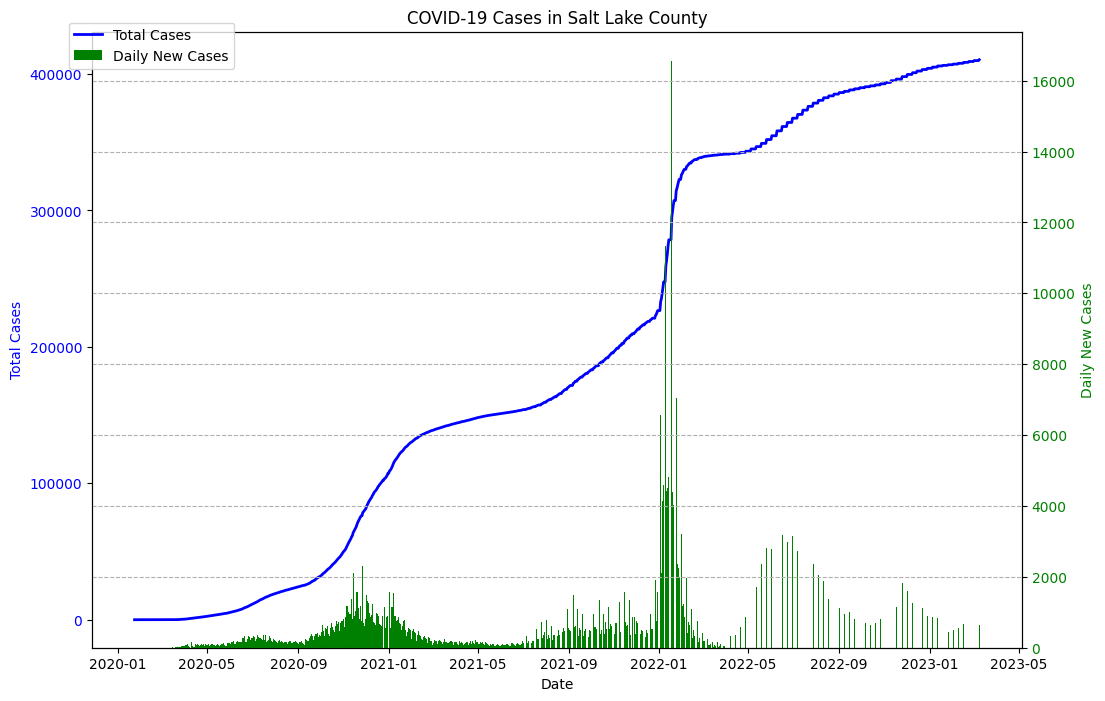

In [4]:
#%% viz 3
'''
Create a visualization that shows BOTH the running total of cases for a single
county AND the daily new cases. The graphic should:
-Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
-Use color to contrast the two series being plotted
-Have well formatted dates as the X axis
'''

utah_df = covid_df[covid_df['Province_State'] == 'Utah']

# Group by county and sum cases over time
utah_counties = utah_df.groupby('Admin2').sum()
time_series = utah_counties.iloc[:, 11:]

# Select a county
county = "Salt Lake"
if county in time_series.index:
    county_cases = time_series.loc[county]
else:
    print(f"{county} not found in Utah data.")
    exit()

# Convert to datetime
county_cases.index = pd.to_datetime(county_cases.index)

# Daily new cases
daily_new_cases = county_cases.diff().fillna(0)

# Plotting with 2 y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Running total
ax1.plot(county_cases.index, county_cases, color='blue', label='Total Cases', linewidth=2)
ax1.set_ylabel('Total Cases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title(f'COVID-19 Cases in {county} County')

# Daily new cases
ax2 = ax1.twinx()
ax2.bar(daily_new_cases.index, daily_new_cases, color='green', label='Daily New Cases', width=1)
ax2.set_ylabel('Daily New Cases', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Formatting
ax1.set_xlabel('Date')
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()

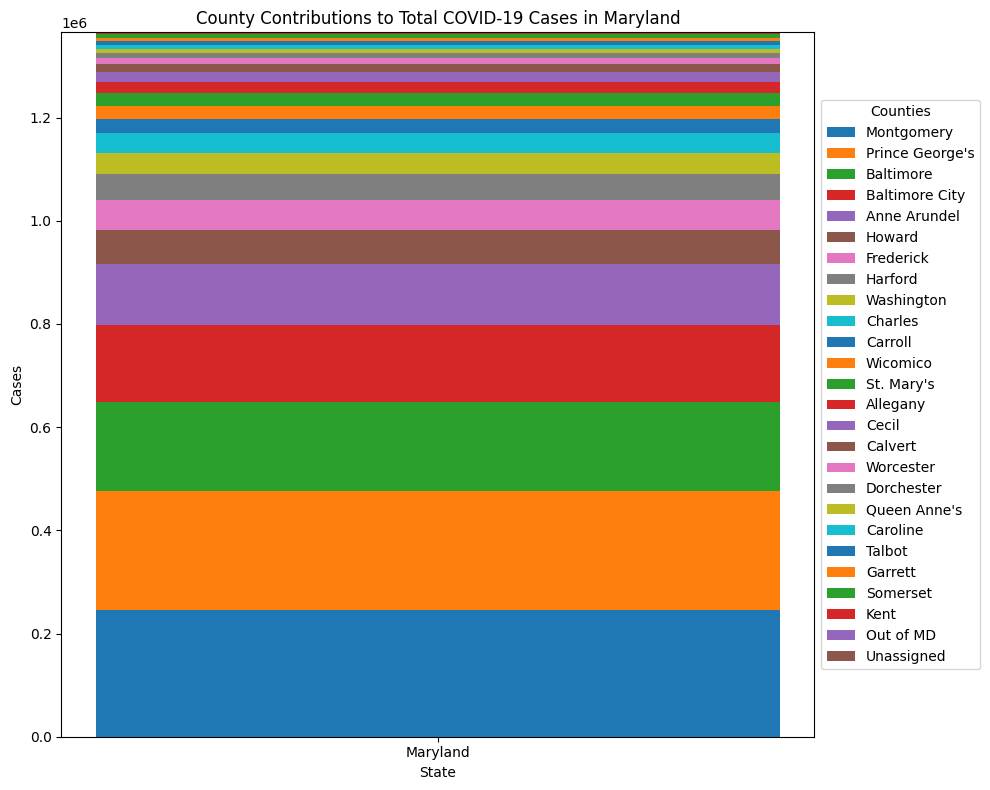

In [5]:
#%% viz 4
'''
Create a visualization that shows a stacked bar chart of county contributions
to a given state's total cases. You may choose any state (or states).
(https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)
The graphic should:
-Have a single column delineate a state
-Have each 'slice' or column compontent represent a county
'''

state = "Maryland"
state_df = covid_df[covid_df['Province_State'] == state]
county_cases = state_df.groupby('Admin2').sum()

# Extract only the final total cases for each county
county_totals = county_cases.iloc[:, -1]  # Last column is the total cases as of the latest date

# Sort counties by total cases (descending)
county_totals = county_totals.sort_values(ascending=False)

# Plotting a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Data for the stacked bar
counties = county_totals.index
cases = county_totals.values
cumulative_cases = [0] * len(counties)

# Stack each county
for i, county in enumerate(counties):
    ax.bar(
        state,  # Single bar for the state
        cases[i],  # Height of the bar is the case count
        bottom=cumulative_cases[i - 1] if i > 0 else 0,
        label=county,)
    cumulative_cases[i] = cumulative_cases[i - 1] + cases[i] if i > 0 else cases[i]

# Formatting
ax.set_title(f"County Contributions to Total COVID-19 Cases in {state}")
ax.set_ylabel("Cases")
ax.set_xlabel("State")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Counties")
plt.tight_layout()

plt.show()